In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [178]:
df_nvdameta = pd.read_csv("META_NVDA_Extract 1.csv")
df.head()

NameError: name 'df' is not defined

In [ ]:
df_nvdameta["date"] = pd.to_datetime(df_nvdameta["date"]).dt.date
df_1 = df.groupby(["date", "ticker"]).agg(price_prediction = ("price_target_after", "mean"))
df_1

In [ ]:
df_2 = df_1.sort_values("date")
df_2
sns.relplot(data = df_2, x = "date", y = "price_prediction", kind = "line", hue = "ticker", aspect = 3)
plt.xticks(rotation = 90)
plt.title("Meta vs Nvidia Price Predictions")

In [301]:
usage_df = pd.read_csv('usage_report.csv') 
usage_1 = usage_df[usage_df["Company"].str.contains('OpenAI')]
len(usage_df)

44

In [2]:
spend_df = pd.read_csv("compute_spend.csv")
spend_1 = spend_df[spend_df["Company"].str.contains("OpenAI")]
len(spend_1)

6

In [3]:
revenue_df = pd.read_csv("revenue_reports.csv")
revenue_1 = revenue_df[revenue_df["Company"].str.contains("OpenAI")]
len(revenue_1)

19

In [4]:
revenue_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Id                                    35 non-null     object 
 1   Company                               35 non-null     object 
 2   Date                                  34 non-null     object 
 3   Revenue amount (normalize to annual)  34 non-null     float64
 4   Annualized revenue (USD)              27 non-null     float64
 5   Type                                  34 non-null     object 
 6   Revenue info (non-annualized)         6 non-null      object 
 7   Confidence                            35 non-null     object 
 8   Source 1                              35 non-null     object 
 9   Source 2                              5 non-null      object 
 10  Source 3                              1 non-null      object 
 11  Notes                

In [5]:
df_ratings = pd.read_csv("query_2019.csv")
df_ratings

,date,company_Name,ticker,broker,analytst,rating_before,rating_after,price_target_before,price_target_after
0,12/2/2019,Intel Corp,INTC,SUSQUEHANNA,CHRISTOPHER ROLLAND,Buy,Buy,NaN,NaN
1,12/3/2019,Alphabet Cl A,GOOGL,CITI,JASON BAZINET,,BUY,72.5,75
2,12/3/2019,Meta Platforms Inc,META,CITI,JASON BAZINET,BUY,BUY,NaN,240
3,12/4/2019,Apple Inc,AAPL,MAXIM GROUP,NEHAL CHOKSHI,SELL,NEGATIVE,NaN,47.5
4,12/4/2019,Meta Platforms Inc,META,HSBC,NICOLAS COTE-COLISSON,NaN,REDUCE,NaN,178
...,...,...,...,...,...,...,...,...,...
5637,9/8/2025,Nvidia Corp,NVDA,NaN,ATIF MALIK,Buy,Buy,200,200
5638,9/9/2025,Apple Inc,AAPL,NaN,DANIEL IVES,Outperform,Outperform,270,270
5639,9/10/2025,Apple Inc,AAPL,NaN,AMIT DARYANANI,Outperform,Outperform,260,260
5640,9/11/2025,Nvidia Corp,NVDA,NaN,GIL LURIA,Neutral,Buy,210,210


In [6]:
df_ratings["rating_before"].unique()

array(['Buy                          ', '                             ',
       'BUY', 'SELL', nan, 'OUTPERFORM', 'Outperform                   ',
       'Overweight                   ', 'STRONGBUY', 'HOLD',
       'UNDERPERFORM', 'OVERWEIGHT', 'Market Perform               ',
       'NEUTRAL', 'UNDERWEIGHT', 'Neutral                      ',
       'POSITIVE', 'Equal Weight                 ',
       'Underperform                 ', 'BUY.', 'MARKET PERFORM',
       'EQUAL WEIGHT', 'EQUALWEIGHT', 'TOP PICK', 'Neutral',
       'Hold                         ', 'Outperform',
       'Positive                     ', 'MARKETPERFORM',
       'Sell                         ', 'INLINE', 'POSITIVE"',
       'OVERWEIGHT"', 'Mkt Perform', 'NEGATIVE', 'OUTPERFORM"', 'REDUCE',
       'Sector Perform               ', 'Overweight',
       'Market Outperform            ', 'Strong Buy                   ',
       'SHORT', 'Underweight                  ', 'STRONG BUY', 'Buy',
       'Underperform', '"POSITIV

In [7]:
df_ratings["rating_after"] = df_ratings["rating_after"].str.lower().str.strip().str.replace('"', '')
df_ratings = df_ratings.dropna(subset=["rating_after"])
df_ratings["rating_after"] = (
    df_ratings["rating_after"]
    .str.strip("'\"") 
)
Ratings_map = {
    # BUY
    "overweight": 1,
    "buy": 1,
    "strong buy": 1,
    "outperform": 1,
    "positive": 1,
    "top pick": 1,
    "market outperform": 1,
    "sector outperform": 1,
    "strongbuy": 1,
    "overweight.": 1,
    "buy)": 1,
    "buy.": 1,
    "market outp": 1,
    "market outperf": 1,
    "€œoutperform": 1,
    "outperform'": 1,
    "'overweight.'": 1,
    "'buy)'": 1,
    "'market outp'": 1,
    "'buy.'": 1,
    "'€œoutperform'": 1,
    "'market outperf'": 1,
    'overweight.': 1,
    'buy)': 1,


    # NEUTRAL
    "neutral": 0,
    "hold": 0,
    "in line": 0,
    "inline": 0,
    "equal weight": 0,
    "equalweight": 0,
    "market perform": 0,
    "market perf": 0,
    "sector perform": 0,
    "sector weight": 0,
    "perform": 0,
    "peerperform": 0,
    "'inline'": 0,
    "'market perf'": 0,
    "'peerperform'": 0,

    # SELL
    "sell": -1,
    "reduce": -1,
    "underperform": -1,
    "underweight": -1,
    "negative": -1,
    "short": -1,
    "avoid": -1,
     "'avoid'": -1,
}

    
len(df_ratings)

5642

In [8]:
df_ratings["after"] = df_ratings["rating_after"].map(Ratings_map).astype("Int64")
df_ratings

,date,company_Name,ticker,broker,analytst,rating_before,rating_after,price_target_before,price_target_after,after
0,12/2/2019,Intel Corp,INTC,SUSQUEHANNA,CHRISTOPHER ROLLAND,Buy,buy,NaN,NaN,1
1,12/3/2019,Alphabet Cl A,GOOGL,CITI,JASON BAZINET,,buy,72.5,75,1
2,12/3/2019,Meta Platforms Inc,META,CITI,JASON BAZINET,BUY,buy,NaN,240,1
3,12/4/2019,Apple Inc,AAPL,MAXIM GROUP,NEHAL CHOKSHI,SELL,negative,NaN,47.5,-1
4,12/4/2019,Meta Platforms Inc,META,HSBC,NICOLAS COTE-COLISSON,NaN,reduce,NaN,178,-1
...,...,...,...,...,...,...,...,...,...,...
5637,9/8/2025,Nvidia Corp,NVDA,NaN,ATIF MALIK,Buy,buy,200,200,1
5638,9/9/2025,Apple Inc,AAPL,NaN,DANIEL IVES,Outperform,outperform,270,270,1
5639,9/10/2025,Apple Inc,AAPL,NaN,AMIT DARYANANI,Outperform,outperform,260,260,1
5640,9/11/2025,Nvidia Corp,NVDA,NaN,GIL LURIA,Neutral,buy,210,210,1


In [9]:
#Get rid of neutrals
df_ratings_clean = df_ratings[df_ratings["after"] != 0].copy()
len(df_ratings_clean)
df_ratings_clean["after"].value_counts(dropna=False)

after
1       4494
-1       272
<NA>       0
Name: count, dtype: Int64

In [349]:
df_ratings_clean.to_csv("/home/c792f676-0422-4818-a060-c40ffb1257f0/Anachart/No_Neutrals.csv", index=False)
import os
os.getcwd()


'/home/c792f676-0422-4818-a060-c40ffb1257f0/Anachart'

In [10]:
# START
df = pd.read_csv('No_Neutrals.csv')
reduced_df = df[['date', 'ticker', 'after']]
# Identify dates that appear more than once and returns only 1 copy of the duplicates
duplicate_dates = reduced_df[reduced_df.duplicated(subset=['date'], keep=False)]['date'].unique()
# Filter the DataFrame to show all rows for these duplicate dates
duplicate_date_rows = reduced_df[reduced_df['date'].isin(duplicate_dates)].sort_values(by='date')
# Calculate the mean of 'after' for each unique 'date' and 'ticker' combination
mean_after_per_day_ticker = duplicate_date_rows.groupby(['date', 'ticker'])['after'].mean().reset_index()
# Rename the 'after' column to 'daily_rating'
mean_after_per_day_ticker = mean_after_per_day_ticker.rename(columns={'after': 'avg_daily_rating'})
# Merge this new column back into the duplicate_date_rows DataFrame
# This will add the 'daily_rating' mean to all rows matching the 'date' and 'ticker' combination
duplicate_date_rows = pd.merge(duplicate_date_rows, mean_after_per_day_ticker, on=['date', 'ticker'], how='left') #merges it back to big (2847 rows) df with all the duplicates, only the rating is from mean_after df. Ratings repeat here.
rating = duplicate_date_rows.drop_duplicates(subset=['date', 'ticker']) #this is the df after duplicates have been removed. It has same # of rows as mean_df (1341 rows)
mean_after_per_day_ticker[0:20]
# Using avg_daily_rating create a daily_rating column
# Define the conditions for daily_rating
conditions = [
    (rating['avg_daily_rating'] > 0),
    (rating['avg_daily_rating'] < 0),
    (rating['avg_daily_rating'] == 0)
]
# Define the choices corresponding to the conditions
choices = [1, -1, 0]
# Create the new 'daily_rating' column using np.select
rating['daily_rating'] = np.select(conditions, choices, default=0)
# remove neutral rating observations where daily_rating = 0
rating = rating[rating['daily_rating'] != 0] #1313 rows now

# Select only the relevant columns from 'rating' to merge: 'date', 'ticker', 'avg_daily_rating', 'daily_rating'
rating_to_merge = rating[['date', 'ticker', 'daily_rating']]
# Perform a left merge with reduced_df on 'date' and 'ticker'
# This adds the sentiment columns to reduced_df where dates and tickers match
merged_df = pd.merge(reduced_df, rating_to_merge, on=['date', 'ticker'], how='left')
# Fill null values in 'daily_rating' with values from 'after'
merged_df['daily_rating'] = merged_df['daily_rating'].fillna(merged_df['after'])
# drop column 'after'
merged_df = merged_df.drop(columns=['after'])
# drop
daily_rating_df = merged_df.drop_duplicates(subset=['date', 'ticker'])
daily_rating_df

/tmp/ipykernel_136/3342218162.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating['daily_rating'] = np.select(conditions, choices, default=0)


,date,ticker,daily_rating
0,12/2/2019,INTC,1.0
1,12/3/2019,GOOGL,1.0
2,12/3/2019,META,1.0
3,12/4/2019,AAPL,-1.0
4,12/4/2019,META,-1.0
...,...,...,...
4761,9/8/2025,NVDA,1.0
4762,9/9/2025,AAPL,1.0
4763,9/10/2025,AAPL,1.0
4764,9/11/2025,NVDA,1.0


In [11]:
%pip install yfinance

import yfinance as yf
import matplotlib.pyplot as plt
import datetime as dt

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Note: you may need to restart the kernel to use updated packages.


In [12]:
tickers = ['NVDA','META','TSLA','GOOGL','MSFT','AAPL','AMZN','INTC']
multi_stock_data = yf.download(tickers, start="2019-11-30")
closed_data = multi_stock_data["Close"]
multi_stock_data_5 = closed_data.copy()
#multi_stock_data_5[0:10]

# Get the closing stock_df price 5 days in the future.
for ticker in tickers:
    # Create a new column for the closing price 5 days in the future.
    # shift(-5) moves the data 5 steps 'up', meaning the value at date X
    # will be the closing price of date X+5.
    multi_stock_data[('Close_5d', ticker)] = multi_stock_data[('Close', ticker)].shift(-5)
# Save closing price and closing price 5 days into the future
multi_stock_data = multi_stock_data[['Close', 'Close_5d']]
# Stack the 'Ticker' level from the columns to create a new index level.
# The result will have a MultiIndex for rows (Date, Ticker) and the price metrics as columns.
stacked_df = multi_stock_data.stack(level='Ticker')
# Reset the index to convert the MultiIndex (Date, Ticker) into regular columns,
# creating a long-format DataFrame.
stock_df = stacked_df.reset_index()
# calc 5 day rate of return and add column to stock_df 
stock_df['5d_return'] = (stock_df['Close_5d'] - stock_df['Close']) / stock_df['Close']
stock_df


[*********************100%***********************]  8 of 8 completed


Price,Date,Ticker,Close,Close_5d,5d_return
0,2019-12-02,AAPL,63.736359,64.402290,0.010448
1,2019-12-02,AMZN,89.080002,87.475502,-0.018012
2,2019-12-02,GOOGL,63.959740,66.645935,0.041998
3,2019-12-02,INTC,50.861416,49.864647,-0.019598
4,2019-12-02,META,198.314697,199.943329,0.008212
...,...,...,...,...,...
12291,2026-01-13,INTC,47.290001,NaN,NaN
12292,2026-01-13,META,631.090027,NaN,NaN
12293,2026-01-13,MSFT,470.670013,NaN,NaN
12294,2026-01-13,NVDA,185.809998,NaN,NaN


In [13]:
# THE MERGE
# convert column names to lowercase
stock_df.columns = stock_df.columns.str.lower()
daily_rating_df.columns = daily_rating_df.columns.str.lower()

# Convert 'date' column in daily_rating_df to datetime objects
daily_rating_df['date'] = pd.to_datetime(daily_rating_df['date'])

# Merge the two dataframes on 'Date' and 'ticker'
combined_df = pd.merge(daily_rating_df, stock_df, on=['date', 'ticker'], how='inner')

/tmp/ipykernel_136/3922536962.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_rating_df['date'] = pd.to_datetime(daily_rating_df['date'])


In [14]:
combined_df

,date,ticker,daily_rating,close,close_5d,5d_return
0,2019-12-02,INTC,1.0,50.861416,49.864647,-0.019598
1,2019-12-03,GOOGL,1.0,64.251526,66.640976,0.037189
2,2019-12-03,META,1.0,197.440826,199.476593,0.010311
3,2019-12-04,AAPL,-1.0,63.152462,65.331215,0.034500
4,2019-12-04,META,-1.0,197.331573,200.856949,0.017865
...,...,...,...,...,...,...
2421,2025-09-08,NVDA,1.0,168.291138,177.740097,0.056147
2422,2025-09-09,AAPL,1.0,234.123047,237.919357,0.016215
2423,2025-09-10,AAPL,1.0,226.570358,238.758560,0.053794
2424,2025-09-11,NVDA,1.0,177.160141,176.230194,-0.005249


In [362]:
# add column describing pre or post ai
combined_df["date"] = pd.to_datetime(combined_df["date"])
# before is considered pre, after or on the day of is considered post
#pre-ai is 0, post-ai is 1
combined_df["ai_status"] = np.where(combined_df["date"] <= pd.Timestamp("2022-11-30"), 0, 1)
combined_df

,date,ticker,daily_rating,close,close_5d,5d_return,ai_status
0,2019-12-02,INTC,1.0,50.861420,49.864651,-0.019598,0
1,2019-12-03,GOOGL,1.0,64.251526,66.640984,0.037189,0
2,2019-12-03,META,1.0,197.440826,199.476578,0.010311,0
3,2019-12-04,AAPL,-1.0,63.152458,65.331223,0.034500,0
4,2019-12-04,META,-1.0,197.331558,200.856934,0.017865,0
...,...,...,...,...,...,...,...
2421,2025-09-08,NVDA,1.0,168.291138,177.740097,0.056147,1
2422,2025-09-09,AAPL,1.0,234.123047,237.919357,0.016215,1
2423,2025-09-10,AAPL,1.0,226.570358,238.758560,0.053794,1
2424,2025-09-11,NVDA,1.0,177.160141,176.230194,-0.005249,1


In [364]:
# SPLIT INTO 2 DATAFRAMES
pre_df = combined_df[combined_df["ai_status"] == 0]
post_df = combined_df[combined_df["ai_status"] == 1]

In [365]:
post_df

,date,ticker,daily_rating,close,close_5d,5d_return,ai_status
1302,2022-12-01,AMZN,1.0,95.500000,90.349998,-0.053927,1
1303,2022-12-05,AAPL,1.0,144.450775,142.342575,-0.014595,1
1304,2022-12-05,TSLA,1.0,182.449997,167.820007,-0.080186,1
1305,2022-12-06,AAPL,1.0,140.786087,143.308044,0.017913,1
1306,2022-12-08,NVDA,1.0,17.151833,16.935047,-0.012639,1
...,...,...,...,...,...,...,...
2421,2025-09-08,NVDA,1.0,168.291138,177.740097,0.056147,1
2422,2025-09-09,AAPL,1.0,234.123047,237.919357,0.016215,1
2423,2025-09-10,AAPL,1.0,226.570358,238.758560,0.053794,1
2424,2025-09-11,NVDA,1.0,177.160141,176.230194,-0.005249,1


In [16]:
# DOWNLOAD DATAFRAMES
#daily_rating_df.to_csv("/home/c792f676-0422-4818-a060-c40ffb1257f0/Anachart/daily_ratings.csv", index=False)
#stock_df.to_csv("/home/c792f676-0422-4818-a060-c40ffb1257f0/Anachart/stocks_df.csv", index=False)
combined_df.to_csv("/home/c792f676-0422-4818-a060-c40ffb1257f0/Anachart/daily_ratings_and_stock_prices.csv", index=False)
#combined_df.to_csv("/home/c792f676-0422-4818-a060-c40ffb1257f0/Anachart/merged_df_ai_status.csv", index=False)
#pre_df.to_csv("/home/c792f676-0422-4818-a060-c40ffb1257f0/Anachart/pre_ai_df.csv", index=False)
#post_df.to_csv("/home/c792f676-0422-4818-a060-c40ffb1257f0/Anachart/post_ai_df.csv", index=False)

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


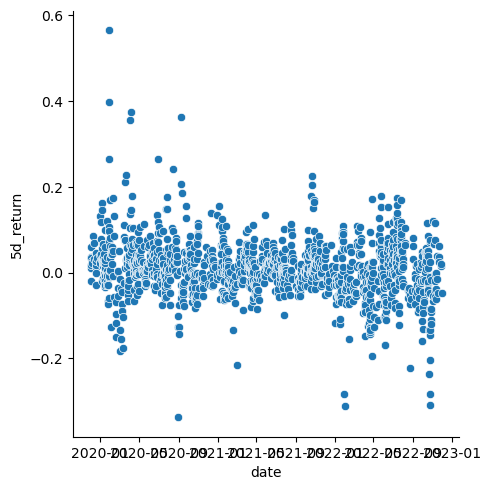

In [339]:
sns.relplot(data = pre_df, x = "date", y = "5d_return")

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


(array([19358., 19478., 19601., 19723., 19844., 19967., 20089., 20209.,
        20332.]),
 [Text(19358.0, 0, '2023-01'),
  Text(19478.0, 0, '2023-05'),
  Text(19601.0, 0, '2023-09'),
  Text(19723.0, 0, '2024-01'),
  Text(19844.0, 0, '2024-05'),
  Text(19967.0, 0, '2024-09'),
  Text(20089.0, 0, '2025-01'),
  Text(20209.0, 0, '2025-05'),
  Text(20332.0, 0, '2025-09')])

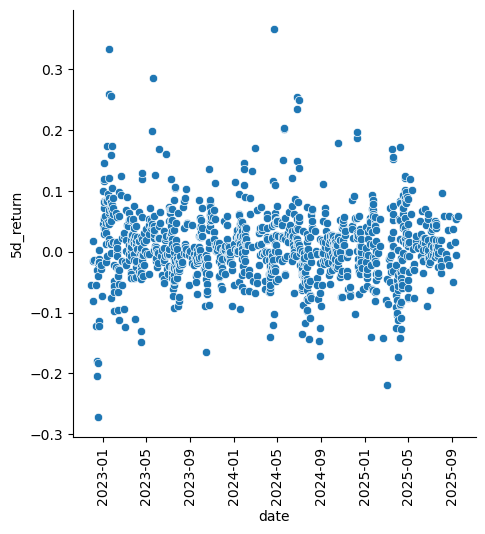

In [340]:
sns.relplot(data = post_df, x = "date", y = "5d_return")
plt.xticks(rotation = 90)

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, '5 Day Returns from 11/30/19 to Present Pre and Post Ai Boom')

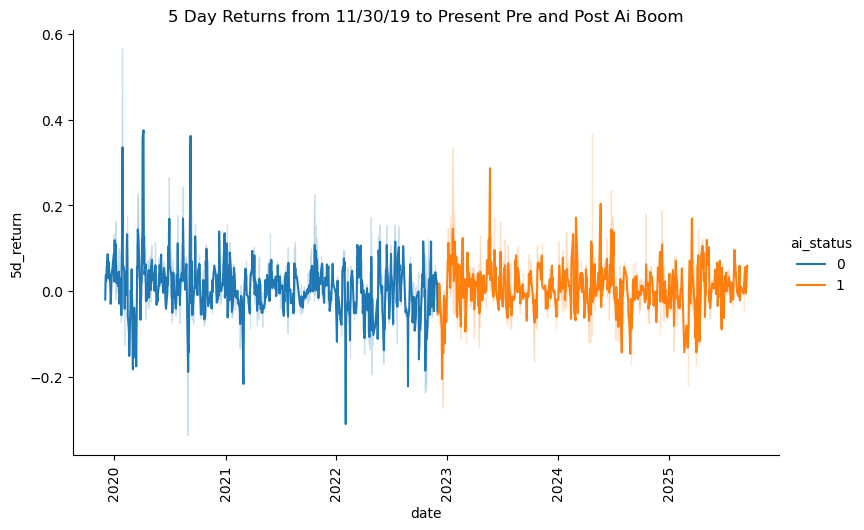

In [343]:
sns.relplot(data = merged_df, x = "date", y = "5d_return", hue = "ai_status", kind = "line", aspect = 1.6)
plt.xticks(rotation = 90)
plt.title("5 Day Returns from 11/30/19 to Present Pre and Post Ai Boom")